In [16]:
from pyopenms import *
enter = []
seq =""
f=FASTAFile()

f.load("human.fasta",enter)
for i in enter:
    seq=seq+i.sequence
dig = ProteaseDigestion()
dig.getEnzymeName() 
bsa = AASequence.fromString(seq)
result = []
dig.digest(bsa, result)
for i in result:
   print(i.toString())

AHK
SEVAHR
FK
DLGEENFK
ALVLIAFAQYLQQCPFEDHVK
LVNEVTEFAK
TCVADESAENCDK
SLHTLFGDK
LCTVATLR
ETYGEMADCCAK
QEPER
NECFLQHK
DDNPNLPR
LVRPEVDVMCTAFHDNEETFLK
K
YLYEIAR
R
HPYFYAPELLFFAK
R
YK
AAFTECCQAADK
AACLLPK
LDELR
DEGK
ASSAK
QR
LK
CASLQK
FGER
AFK
AWAVAR
LSQR
FPK
AEFAEVSK
LVTDLTK
VHTECCHGDLLECADDR
ADLAK
YICENQDSISSK
LK
ECCEKPLLEK
SHCIAEVENDEMPADLPSLAADFVESK
DVCK
NYAEAK
DVFLGMFLYEYAR
R
HPDYSVVLLLR
LAK
TYETTLEK
CCAAADPHECYAK
VFDEFKPLVEEPQNLIK
QNCELFEQLGEYK
FQNALLVR
YTK
K
VPQVSTPTLVEVSR
NLGK
VGSK
CCK
HPEAK
R
MPCAEDYLSVVLNQLCVLHEK
TPVSDR
VTK
CCTESLVNR
RPCFSALEVDETYVPK
EFNAETFTFHADICTLSEK
ER
QIK
K
QTALVELVK
HKPK
ATK
EQLK
AVMDDFAAFVEK
CCK
ADDK
ETCFAEEGK
K
LVAASQAALGLMLIK
VK
TLTGK
EIEIDIEPTDK
VER
IK
ER
VEEK
EGIPPQQQR
LIYSGK
QMNDEK
TAADYK
ILGGSVLHLVLALR
GGGGLR
QMTEYK
LVVVGAGGVGK
SALTIQLIQNHFVDEYDPTIEDSYR
K
QVVIDGETCLLDILDTAGQEEYSAMR
DQYMR
TGEGFLCVFAINNTK
SFEDIHQYR
EQIK
R
VK
DSDDVPMVLVGNK
CDLAAR
TVESR
QAQDLAR
SYGIPYIETSAK
TR
QGVEDAFYTLVR
EIR
QHK
LR
K
LNPPDESGPGCMSCK
CVLSADSR
DPASDQMQHWK
EQR
AAQK
ADVLT

In [17]:
from pyopenms import *
enter = []
seq =""
f=FASTAFile()
f.load("human.fasta",enter)
for i in enter :
    seq=seq+i.sequence
dig = ProteaseDigestion()
dig.getEnzymeName()
bsa = AASequence.fromString(seq)
result = []
dig.digest(bsa, result)
peptides = [AASequence.fromString(i.toString()) for i in result]

for peptide in peptides:
    tsg = TheoreticalSpectrumGenerator()
    theo_spectrum = MSSpectrum()
    spec1 = MSSpectrum()

    p = Param()
    p.setValue("add_b_ions", "true")
    p.setValue("add_y_ions", "true")
    p.setValue("add_losses", "true")
    p.setValue("add_metainfo", "true")
    tsg.setParameters(p)
    tsg.getSpectrum(spec1, peptide, 1, 1) 
    print("Spectrum 1 of", peptide, "has", spec1.size(), "peaks.")
    for ion, peak in zip(spec1.getStringDataArrays()[0], spec1):
        print(ion.decode(), "is generated at m/z", peak.getMZ())


Spectrum 1 of AHK has 5 peaks.
y1-H3N1+ is generated at m/z 130.086255817671
y1+ is generated at m/z 147.112804913371
b2+ is generated at m/z 209.10330284957104
y2-H3N1+ is generated at m/z 267.14516804097104
y2+ is generated at m/z 284.171717136671
Spectrum 1 of SEVAHR has 29 peaks.
b2-H2O1+ is generated at m/z 112.039305626271
y1-C1H2N1O1+ is generated at m/z 131.10531384957102
y1-C1H2N2+ is generated at m/z 133.097154849571
y1-H3N1+ is generated at m/z 158.092403817671
y1+ is generated at m/z 175.118952913371
b3-H2O1+ is generated at m/z 211.107719913371
b2+ is generated at m/z 217.08189984957102
y2-C1H2N1O1+ is generated at m/z 268.1642260728711
y2-C1H2N2+ is generated at m/z 270.15606707287105
b4-H2O1+ is generated at m/z 282.144834072871
y2-H3N1+ is generated at m/z 295.1513160409711
y2+ is generated at m/z 312.1778651366711
b3+ is generated at m/z 316.150314136671
y3-C1H2N1O1+ is generated at m/z 339.2013402323711
y3-C1H2N2+ is generated at m/z 341.19318123237105
y3-H3N1+ is gen

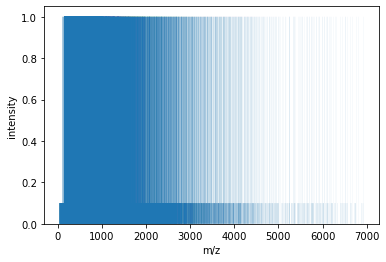

In [18]:
import numpy as np
from matplotlib import pyplot as plt
for r in result:
    peptide = AASequence.fromString(r.toString())
    tsg.getSpectrum(spec1,r,1,1)
plt.bar(spec1.get_peaks()[0], spec1.get_peaks()[1], snap=False) 
plt.xlabel("m/z")
plt.ylabel("intensity")
plt.show()

In [19]:
from pyopenms import *
exp = MSExperiment()
MzMLFile().load("Fusion_180220_40.mzML", exp)
spectra = exp.getSpectra()
observed_spectrum = spectra[0]

In [20]:
tsg = TheoreticalSpectrumGenerator()
theo_spectrum = MSSpectrum()
p = tsg.getParameters()
p.setValue("add_y_ions", "true")
p.setValue("add_b_ions", "true")
p.setValue("add_metainfo", "true")
tsg.setParameters(p)
tsg.getSpectrum(theo_spectrum, peptide, 1, 1)

40.018175498671
6934.325783934568


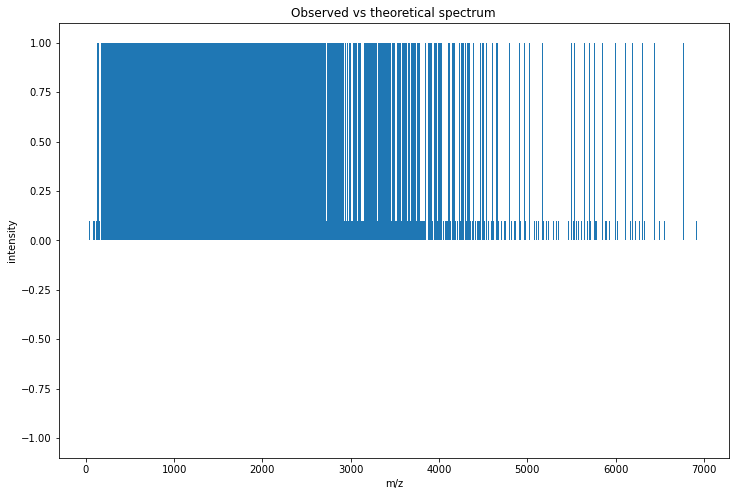

In [21]:
import numpy as np
from matplotlib import pyplot as plt
def mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title):
    obs_int = [element / max(obs_int) for element in obs_int] 
    theo_int = [element * -1 for element in theo_int] 
    plt.figure(figsize=(12,8))
    plt.bar(obs_mz, obs_int, width = 3.0)
    plt.bar(theo_mz, theo_int, width = 3.0)
    plt.title(title)
    plt.ylabel('intensity')
    plt.xlabel('m/z')

obs_mz, obs_int = observed_spectrum.get_peaks()
print(min(obs_mz)) 
print(max(obs_mz)) 


theo_mz, theo_int = [], []
for mz, intensity in zip(*theo_spectrum.get_peaks()):
    if mz >= min(obs_mz) and mz <= max(obs_mz):
        theo_mz.append(mz)
        theo_int.append(intensity)

title = 'Observed vs theoretical spectrum'
mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title)

In [22]:
alignment = []
spa = SpectrumAlignment()
p = spa.getParameters()
p.setValue("tolerance", 0.5)
p.setValue("is_relative_tolerance", "false")
spa.setParameters(p)
spa.getSpectrumAlignment(alignment, theo_spectrum, observed_spectrum)

In [23]:
print("Number of matched peaks: " + str(len(alignment)))
print("ion\ttheo. m/z\tobserved m/z")

for theo_idx, obs_idx in alignment:
    ion_name = theo_spectrum.getStringDataArrays()[0][theo_idx].decode()
    ion_charge = theo_spectrum.getIntegerDataArrays()[0][theo_idx]
    print(ion_name + "\t" + str(ion_charge) + "\t"
      + str(theo_spectrum[theo_idx].getMZ())
      + "\t" + str(observed_spectrum[obs_idx].getMZ()))

Number of matched peaks: 3
ion	theo. m/z	observed m/z
y1+	1	147.076419785771	147.076419785771
b2+	1	159.076419785771	159.076419785771
y2+	1	234.10844894527105	234.10844894527105


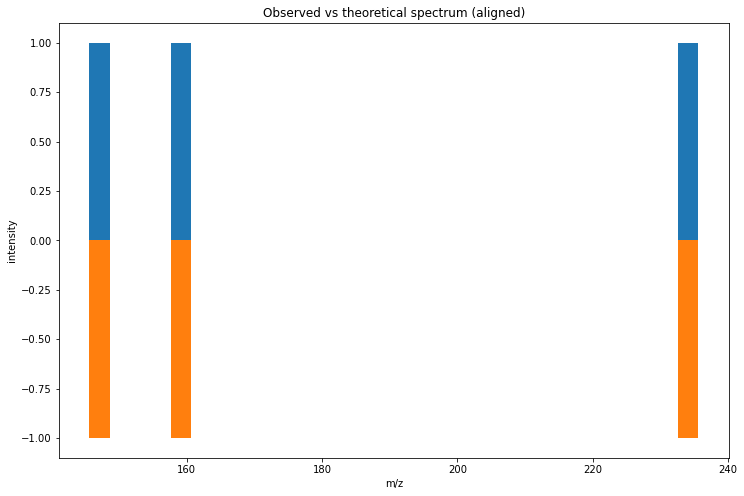

In [24]:
theo_mz, theo_int, obs_mz, obs_int = [], [], [], []
for theo_idx, obs_idx in alignment:
    theo_mz.append(theo_spectrum[theo_idx].getMZ())
    theo_int.append(theo_spectrum[theo_idx].getIntensity())
    obs_mz.append(observed_spectrum[obs_idx].getMZ())
    obs_int.append(observed_spectrum[obs_idx].getIntensity())

title = 'Observed vs theoretical spectrum (aligned)'
mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title)

In [11]:
from pyopenms import *
import matplotlib.pyplot as plt

In [12]:
exp = MSExperiment()
MzMLFile().load("D:\\fourth year projects\\Fusion_180220_40.mzML", exp)

In [13]:
def plotSpectrun(index):
    fig = plt.subplots(figsize =(10, 7))
    spec=exp[index]
    mz, intensity = spec.get_peaks()
    
    p1 = plt.bar(mz, intensity)
    plt.ylim([0, max(intensity)])
    plt.xlim([100, 800])
    
    plt.title("MS Level: " + str(spec.getMSLevel()))
    plt.ylabel('Intensity')
    plt.xlabel('m/z')
    plt.show()

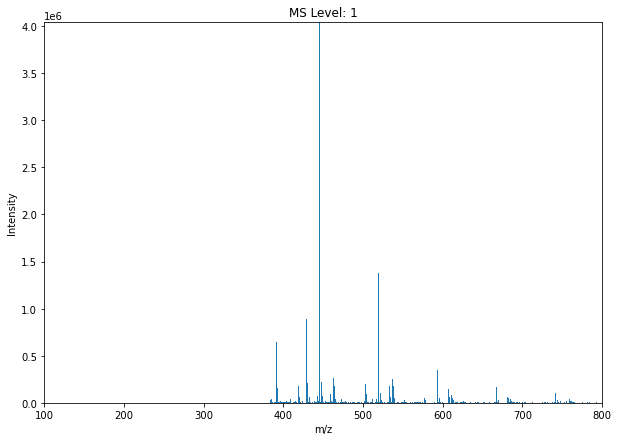

In [14]:
plotSpectrun(1000)

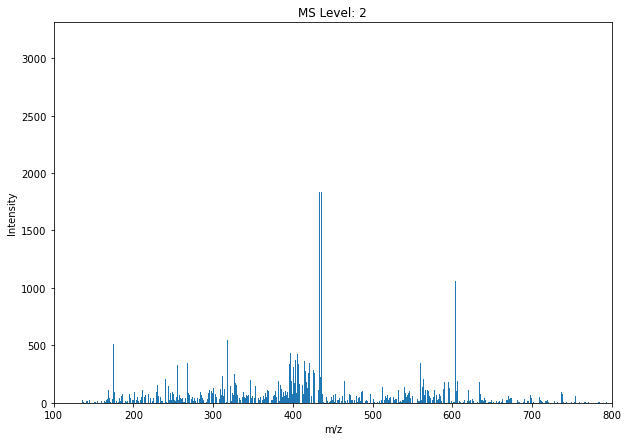

In [15]:
plotSpectrun(10010)